<a href="https://colab.research.google.com/github/CreativeFun/Neural-Network-Training/blob/main/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### COVID-19 Coronavirus Pandemic 

Source od data: https://www.kaggle.com/datasets/rinichristy/covid19-coronavirus-pandemic?resource=download

Wczytanie i wypisanie danych

In [2]:
import pandas as pd

df = pd.read_csv("COVID-19 Coronavirus.csv")
df.head(6) #Przedstawienie danych z pliku

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438
5,Anguilla,Anguilla,AIA,15237,Latin America and the Caribbean,2700,9,177200,591,0.333333


In [3]:
df.tail(7)

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
218,Venezuela,Venezuela (Bolivarian Republic of),VEN,28294895,Latin America and the Caribbean,520843,5686,18408,201,1.091692
219,Vietnam,Viet Nam,VNM,98871712,Asia,9818328,42600,99304,431,0.433882
220,Wallis and Futuna,Wallis and Futuna Islands,WLF,10894,Oceania,454,7,41674,643,1.541850
221,Western Sahara,Western Sahara,ESHÂ,623031,Africa,10,1,16,2,10.000000
222,Yemen,Yemen,YEM,30975258,Asia,11806,2143,381,69,18.151787
223,Zambia,Zambia,ZMB,19284482,Africa,317076,3967,16442,206,1.251120
224,Zimbabwe,Zimbabwe,ZWE,15241601,Africa,246525,5446,16174,357,2.209107


In [4]:
df.isnull().sum()

Country                    0
Other names                1
ISO 3166-1 alpha-3 CODE    0
Population                 0
Continent                  0
Total Cases                0
Total Deaths               0
Tot Cases//1M pop          0
Tot Deaths/1M pop          0
Death percentage           0
dtype: int64

In [5]:
import numpy as np
empty = df[df['Other names'].isnull()]

print("Wypisanie wiersza, który ma pustą wartość w kolumnie 'Other names' ")
empty.head()

Wypisanie wiersza, który ma pustą wartość w kolumnie 'Other names' 


,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
135,Montenegro,NaN,MNE,628205,Europe,233326,2705,371417,4306,1.159322


In [24]:
df.describe()


,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438
5,Anguilla,Anguilla,AIA,15237,Latin America and the Caribbean,2700,9,177200,591,0.333333


In [7]:
deaths = df.sort_values(by='Total Deaths', ascending =False)

deaths.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
214,USA,United States of America,USA,334400597,Northern America,81839052,1008222,244734,3015,1.231957
26,Brazil,Brazil,BRA,215204501,Latin America and the Caribbean,29999816,660269,139401,3068,2.200910
92,India,India,IND,1403754381,Asia,43029044,521388,30653,371,1.211712
165,Russia,Russian Federation,RUS,146044010,Europe,17896866,369708,122544,2531,2.065770
130,Mexico,Mexico,MEX,131303955,Latin America and the Caribbean,5665376,323212,43147,2462,5.705041


In [8]:
# maxcontinent = df.iloc[:,4:6]
# continents = df.iloc[:,4]
# continents.unique()
# # print(continents.drop_duplicates())
# continents = list(continents.drop_duplicates())
# print(continents)
# print(maxcontinent)
# maxcontinent['sum'] = maxcontinent[continents].sum()
maxcontinent = df.groupby(['Continent']).sum()
# maxcontinent.sort_values(by = 'Total Deaths', ascending=False)
maxcontinent = maxcontinent.iloc[:,[2]]
print(maxcontinent.sort_values(by = 'Total Deaths', ascending = False))

                                 Total Deaths
Continent                                    
Europe                                1775727
Latin America and the Caribbean       1686828
Asia                                  1405003
Northern America                      1046062
Africa                                 252873
Oceania                                  9336


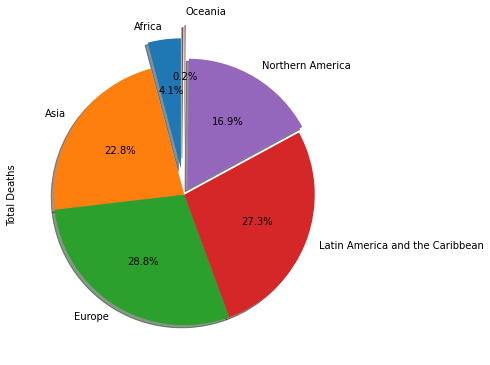

In [9]:
import matplotlib.pyplot as plt 

my_data = df.groupby(['Continent']).sum()
continents = df.iloc[:,4]
continents.unique()
continents = list(continents.drop_duplicates())
my_data = my_data.iloc[:,2]
explode = (0.2, 0, 0, 0,0.05, 0.3)
# print(my_data)
my_data.plot.pie( y='Continent',figsize=(11, 6),explode=explode,autopct='%1.1f%%', startangle=90, shadow=True)

In [25]:
maxcontinent = df.groupby(['ISO 3166-1 alpha-3 CODE']).sum()
# maxcontinent.sort_values(by = 'Total Deaths', ascending=False)
maxcontinent = maxcontinent.iloc[:,[2]]
print(maxcontinent.sort_values(by = 'Total Deaths', ascending = False))

                         Total Deaths
ISO 3166-1 alpha-3 CODE              
USA                           1008222
BRA                            660269
IND                            521388
RUS                            369708
MEX                            323212
...                               ...
FSM                                 0
MAC                                 0
NIU                                 0
MHL                                 0
COK                                 0

[225 rows x 1 columns]


,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438
5,Anguilla,Anguilla,AIA,15237,Latin America and the Caribbean,2700,9,177200,591,0.333333


In [26]:
bigest = df['Total Deaths'].max()
print('Biggest number of deaths is: ' + str(bigest))

Biggest number of deaths is: 1008222


,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438
5,Anguilla,Anguilla,AIA,15237,Latin America and the Caribbean,2700,9,177200,591,0.333333


In [52]:
df.head(6)
bigestperm = df.iloc[:,-2].idxmax()

print('Biggest number of deaths per milion is: ')
print(df.loc[bigestperm])

Biggest number of deaths per milion is: 
Country                                               Peru
Other names                                           Peru
ISO 3166-1 alpha-3 CODE                                PER
Population                                        33775745
Continent                  Latin America and the Caribbean
Total Cases                                        3548559
Total Deaths                                        212328
Tot Cases//1M pop                                   105062
Tot Deaths/1M pop                                     6286
Death percentage                                  5.983499
Name: 158, dtype: object


[tekst linku](https://)
5. Zmiana nazw kolumn
6. Największa umieralność w procentach
7. Korelacja między kontynentmem a umieralnością per milion
